# Artificial Neural Networks (Project Part 3/3)

## Author - Rodolfo Lerma

# Problem

Continue from Milestone 2 to build a simple neural netwok, a DNN & a RNN model and compare performance.

# Abstract:

The capstone project focuses on diaper manufacturing quality. Generally, to ensure or predict quality, a diaper manufacturer need s to monitor every step of the manufacturing process with sensors such as heat sensors, glue sensors, glue level, etc.
For this capstone project, we will use the SECOM manufacturing Data Set from the UCI Machine Learning Repository.

The analysis is is divided the following way:

### Summary from Milestone 01 & Milestone 02


### Data Formatting
- **Merging Data**
- **Missing Data**
- **Repeated Values (Columns with the same value)**


### Feature Selection

### Analysis
- **Normalizing features from 0-1**
- **Split Data and Class Imbalance**
    - Split Data
    - Class Imbalance
- **Simple Neural Network**
- **Deep Neural Network**
- **Recurrent Neural Network**

### Summary of Models Performance

# Summary from Milestone 01 & 02

## Milestone 01

- For this analysis we initially had 590 features + date and the target variable (quality of the diaper as either good or bad). After some cleaning (removing columns with a lot of missing values and columns with the same value repeated in all rows) we ended up with a data frame with 538 features + data + target variable.


- In this case it seems that the `Wrapper` feature selection method is the one offering a better selection to model the quality of the diapers by means of the manufacturing process.


- The class imbalance problem was solved my means of re-sampling.

| Target | -1 | 1294 |
| --- | --- | --- |
| Target | 1 | 99 |

## Milestone 02

- From this analysis the best model was the one from the `Random Forest` with the following performance values:

| Performance | Value |
| -- | --|
| Accuracy | 0.9713 |
| Error Rate | 0.0287 |
| Precision | 0.9922 |
| Recall | 0.9769|
| F1 Score | 0.9845 |

- The best hyperparameters for this model after a random grid search were:
- `n_estimators`: 70
- `min_samples_split`: 4
- `min_samples_lead`:  2
- `max_depth`: 10
- `criterion`: gini

# Data Formatting

## Merging Data

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Load File
filename = 'secom.data'
filename2 = 'secom_labels.data'
data = pd.read_csv(filename,header=None, sep = '\s+')
others = pd.read_csv(filename2,header=None,sep = '\s+')

others.columns = ['target', 'date']
df = pd.concat([others,data], axis = 1)
df['date']= pd.to_datetime(df['date']) #date to datetime

## Missing Data

In [3]:
missing_values = []
my_list = df.columns.values.tolist()
y = df.shape
for i in my_list:
    x = df[i].isnull().sum()
    missing_values.append(x)
    
columns_missing = dict(zip(my_list, missing_values))
a = sorted(columns_missing.items(), key=lambda x: x[1], reverse = True)  

As before if more than 15% of data is missing in a column that column would be dropped from this data set at this moment. For other columns with missing data is present depending on how much data is missing is going to be either dropped or imputed.

In [4]:
missing_columns_names = []
for key, value in columns_missing.items():
    if value > 240: #15% of the data
        x = key
        missing_columns_names.append(x)

Those columns would be eliminated from the data set, since most of the values are missing.

In [5]:
df = df.drop(missing_columns_names, axis = 1)
df = df.dropna()

For this analysis since removing missing data would only take 10% of the available data, those raws are going to be remove. If by removing missing data more than 15% were to be removed other methods would have been explored as: substitution.
Even at this moment having 540 variables/features is to much to explore and obtain meaninful results, therefore more work has to be done.

## Repeated Values (Columns with the same value)

In [6]:
not_repeated = []
repeated = []
updated_columns = df.columns.values.tolist()
y = df.shape
for i in updated_columns[2:]:
    x = df[i].std()
    if x == 0:
        repeated.append(i)
    else:
        not_repeated.append(i)
df = df.drop(repeated, axis = 1)

categorical = []
numerical = []
updated_columns = df.columns.values.tolist()
y = df.shape
for i in updated_columns:
    x = df[i].dtypes
    if x == object:
        categorical.append(i)
    else:
        numerical.append(i)

In [7]:
tr = df.iloc[:,0].tolist()
binomial = []
for i in range(len(tr)):
    b = tr[i]
    if b < 0:
        n = 0
    else:
        n = 1
    binomial.append(n)
df['target_binomial'] = binomial

In [8]:
df.head()

,target,date,0,1,2,3,4,6,7,8,...,577,582,583,584,585,586,587,588,589,target_binomial
1,-1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,1,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,-1,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,-1,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0
5,-1,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5287,...,13.7755,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,0


Thru the code above the data was checked to see if there was any variable that could be considered as categorical (also this helped to checked any column with incorrect values)

# Feature Selection

From Milestone 01 it was seen that the best Features where does coming from the `Wrapper` Method. For more details on this comparison see **Milestone 01** analysis.

In [9]:
# Recursive Feature Elimination
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, 50, step=1)

df_numeric = df[numerical]
df_numeric = df_numeric.drop('date', axis = 1)

df_numeric_copy = df_numeric.copy()

target = df_numeric.iloc[:,0]#This is the selection of the Target Variables
df_updated = df_numeric_copy.drop('target', axis='columns')

lol = df_updated.values.tolist()
selector = selector.fit(lol, target)

boolean_values = selector.support_
ranking_values = selector.ranking_
wrapper_columns = df_updated.columns.values.tolist()

#Selection of the features with ranking 1
selected_features = []
unselected_features = []
for i in range(len(wrapper_columns)):
    w = boolean_values[i]
    if w == True:
        b = wrapper_columns[i]
        selected_features.append(b)
    else:
        v = wrapper_columns[i]
        unselected_features.append(v)

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=50 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [10]:
df[selected_features].head()

,12,16,18,34,36,43,45,48,50,53,...,365,366,367,368,377,387,392,446,543,544
1,200.5470,9.2599,191.2872,50.6596,49.3404,352.2445,133.1727,145.8445,631.2618,4.590,...,0.0053,0.0059,0.0081,0.0033,0.0013,0.0,0.0027,1.5683,0.0078,0.0026
2,202.0179,9.3144,192.7035,50.1530,49.8470,364.3782,131.8027,141.0845,637.2655,4.486,...,0.0054,0.0043,0.0030,0.0037,0.0015,0.0,0.0020,1.4698,0.0078,0.0026
3,201.8482,9.6924,192.1557,50.5100,49.4900,363.0273,131.8027,142.5427,637.3727,4.486,...,0.0046,0.0049,0.0028,0.0034,0.0014,0.0,0.0023,1.3141,0.0078,0.0026
4,201.9424,10.3387,191.6037,50.2480,49.7520,353.3400,176.3136,138.0882,667.7418,4.624,...,0.0063,0.0077,0.0052,0.0027,0.0012,0.0,0.0077,1.2524,0.0078,0.0026
5,200.4720,9.2441,191.2280,50.5795,49.4205,360.2873,142.2591,137.6473,640.1936,4.636,...,0.0095,0.0048,0.0033,0.0027,0.0011,0.0,0.0081,1.1174,0.0078,0.0026


# Analysis

## Split Data and Class Imbalance

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

tr = df.iloc[:,0].tolist()
binomial = []
for i in range(len(tr)):
    b = tr[i]
    if b < 0:
        n = 0
    else:
        n = 1
    binomial.append(n)
df['target_binomial'] = binomial

## Normalizing features from 0-1

In [12]:
from sklearn import preprocessing

label = df['target_binomial']
variables = df[selected_features]

x = variables.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
variables_scaled = pd.DataFrame(x_scaled)

In [13]:
#Rounding the variables to explore the normalization of the parameters as an input for the LSTM
round_variables = variables_scaled*100
variables_round = round_variables.round()
variables_round = variables_round

### Split Data

In [14]:
#Split the data for variables with high mi value
X_train, X_test, y_train, y_test = train_test_split(variables_scaled, label, test_size=0.30, random_state=42)
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(variables_round, label, test_size=0.30, random_state=42)

### Class Imbalance

In [15]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

variables_sm, label_sm = sm.fit_resample(variables_scaled, label)
variables_sm_rnn, label_sm_rnn = sm.fit_resample(variables_round, label)

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(variables_sm, label_sm, test_size=0.30, random_state=42)
X_train_sm_rnn, X_test_sm_rnn, y_train_sm_rnn, y_test_sm_rnn = train_test_split(variables_sm_rnn, label_sm_rnn, test_size=0.30, random_state=42)

In summary the variables that are going to be input to the model are:
- Training:
    - `X_train_sm`
    - `y_train_sm`
    
    
- Testing:
    - `X_test`
    - `y_test`

## Simple Neural Network

During Assignment 08 a simple and multiyer neural network was created from scratch, but in this case a model from the **scikit-learn** library will be used. Also it is important to notice that an ANN with no hidde layers would be basically a multi regression problem, for that reason the LogisticRegressioCV module would be used.

In [16]:
from sklearn.linear_model import LogisticRegressionCV

#Some hyperparamaters:
fit_inter = True #this is the Bias parameter
max_iterations = 1000 #this is the number of epochs
initial_weights = 'balanced'

snn = LogisticRegressionCV(cv=5, 
                           fit_intercept = fit_inter,
                           max_iter = max_iterations, 
                           solver='lbfgs',
                           class_weight = initial_weights,
                           random_state=0).fit(X_train_sm, y_train_sm)

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

In [17]:
#Testing of the data
y_snn_pred = snn.predict(X_test)

In [18]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score
snn_accuracy = accuracy_score(y_test, y_snn_pred)*100
print("Simple Neural Network (no hidden layers) accuracy: {}%".format(snn_accuracy))

Simple Neural Network (no hidden layers) accuracy: 69.85645933014354%


As we can see from the noted results, a simple neural network model provided a fairly good Accuracy value. Compared with the previous models from Milestone 02: `Decision Tree`, `Random Forest` & `SVC` this model was not able to obtain the high Accuracy values from previous analysis.

### Small comparison with model from scratch from Assignment 08

In [19]:
# Creating a numerically stable logistic s-shaped definition to call
def sigmoid(x):
    x = np.clip(x, -500, 500)
    if x.any()>=0:
        return 1/(1 + np.exp(-x))
    else:
        return np.exp(x)/(1 + np.exp(x))
    
# define the dimentions and set the weights to random numbers
def init_parameters(dim1, dim2,std=1e-1, random = True):
    if(random):
        return(np.random.random([dim1,dim2])*std)
    else:
        return(np.zeros([dim1,dim2]))
    
# Single layer network: Forward Prop
def fwd_prop(W1,bias,X):
    Z1 = np.dot(W1,X) + bias# dot product of the weights and X + bias
    A1 = sigmoid(Z1)# Uses sigmoid to create a predicted vector
    return(A1)

#Single layer network: Backprop
def back_prop(A1,W1,bias,X,Y):
    m = np.shape(X)[1] # used the calculate the cost by the number of inputs -1/m
    # Cross entropy loss function
    cost = (-1/m)*np.sum(Y*np.log(A1) + (1-Y)*np.log(1-A1))# cost of error
    dZ1 = A1 - Y# subtract actual from pred weights
    dW1 = (1/m) * np.dot(dZ1, X.T)# calc new weight vector
    dBias = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)# calc new bias vector
    grads ={"dW1": dW1, "dB1":dBias}# Weight and bias vectors after backprop
    return(grads,cost)

def run_grad_desc(num_epochs,learning_rate,X,Y,n_1):
    n_0, m = np.shape(X)
    W1 = init_parameters(n_1, n_0, True)
    B1 = init_parameters(n_1,1, True)
    loss_array = np.ones([num_epochs])*np.nan# resets the loss_array to NaNs
    for i in np.arange(num_epochs):
        A1 = fwd_prop(W1,B1,X)# get predicted vector
        grads,cost = back_prop(A1,W1,B1,X,Y)# get gradient and the cost from BP 
        W1 = W1 - learning_rate*grads["dW1"]# update weight vector LR*gradient*[BP weights]
        B1 = B1 - learning_rate*grads["dB1"]# update bias LR*gradient[BP bias]
        loss_array[i] = cost# loss array gets cross ent values
        parameter = {"W1":W1,"B1":B1}# assign 
    return(parameter,loss_array, A1)

In [20]:
#Getting the variables in the right format for the model from scratch
#Training Data
y_train_sm_df = pd.DataFrame(y_train_sm)
X_train_sm_df = pd.DataFrame(X_train_sm)
X = np.array(X_train_sm_df)
X = X.T
Y = np.array(y_train_sm_df)

#Testing Data
y_test_df = pd.DataFrame(y_test)
X_test_df = pd.DataFrame(X_test)
K = np.array(X_test_df)
K = K.T
L = np.array(y_test_df)

In [21]:
#Model with no hidden layers
num_epochs = 1000
learning_rate = 0.01
params, loss_array, prediction = run_grad_desc(num_epochs,
                                               learning_rate,
                                               X, 
                                               Y,
                                               n_1= 1)

In [22]:
prediction_test = fwd_prop(params['W1'][:len(L)],params['B1'][:len(L)],K)

In [23]:
delta = []
test_pred = prediction_test[1]
for i in range(len(prediction_test[1])):
    d = abs(test_pred[i] - L[i])
    delta.append(d)

total_delta = sum(delta)
nn0_accuracy = (1 - total_delta[0]/len(L))*100
print('Accuracy: ' + str(nn0_accuracy) + '%')

Accuracy: 92.12315971183018%


Doing a quick comparison (not really an exhaustive comparison) it seems to be that with 1000 Epochs the model from scratch simulating a simple neural network with no hidden layers and just 1 preceptor get us to a better Accuracy value on the testing data set, from 69% to 92%.

## Deep Neural Network Model

### Scikit Learn

In [24]:
from sklearn.neural_network import MLPClassifier

#Some hyperparamaters:
hidden = 50
act = 'relu'
opt = 'adam'
lr = 'adaptive'
lr_value = 0.01
epoch = 1000

dnn = MLPClassifier(hidden_layer_sizes = hidden,
                    activation = act,
                    solver = opt,
                    learning_rate = lr,
                    learning_rate_init = lr_value,
                    max_iter = epoch,
                    random_state=1).fit(X_train_sm, y_train_sm)

In [25]:
#Testing of the data
y_dnn_pred = dnn.predict(X_test)

In [26]:
dnn_accuracy = accuracy_score(y_test, y_dnn_pred)*100
print("Deep Neural Network accuracy: {}%".format(dnn_accuracy))

Deep Neural Network accuracy: 88.27751196172248%


### Keras

In [27]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [28]:
#Simple Deep Neural Network will be presented here
model = keras.Sequential([
    keras.layers.Dense(100, input_dim = 50, activation='relu'), 
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', 
              loss='binary_crossentropy',
              metrics=['BinaryAccuracy'])

In [29]:
model.fit(X_train_sm, y_train_sm, verbose=0, epochs=1000)

In [30]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
keras_dnn_accuracy = test_accuracy * 100
print("Keras Deep Neural Network accuracy: {}%".format(keras_dnn_accuracy))

14/14 [==============================] - 0s 1ms/step - loss: 0.1125 - binary_accuracy: 0.9617
Keras Deep Neural Network accuracy: 96.17224931716919%


It is possible to see that the Keras model performed better than the MPL classifier from sklearn having 1000 epochs in both cases, but also it is possible to see that the computer resources used were pretty different as well. The Keras model consumed more resources than the sklearn model.

## Recurrent Neural Network Model

### Formatting the input for the LSTM model

In [31]:
#For LSTM Model
def sequence_LSTM(df):
    sequence = []
    for i in range(len(df[1])):
        rows = df.iloc[i]
        rows1 = rows.tolist()
        sequence.append(rows1)
    return sequence
        
X_test_LSTM = sequence_LSTM(X_test_rnn)
X_train_sm_LSTM = sequence_LSTM(X_train_sm_rnn)

X_train_sm_LSTM = np.array(X_train)
X_test_LSTM = np.array(X_test)

train_data = X_train_sm_LSTM.reshape(975, 1, 50)
test_data = X_test_LSTM.reshape(418, 1, 50)

y_train_data = np.array(y_train)
y_test_data = np.array(y_test)

In [32]:
model1 = keras.Sequential()
model1.add(keras.layers.LSTM(100, input_shape = (975,50), return_sequences=True))
model1.add(keras.layers.LSTM(100, return_sequences=True))
model1.add(keras.layers.LSTM(100))
model1.add(keras.layers.Dense(1, activation = 'sigmoid'))

model1.summary()

# Model Compilation
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['BinaryAccuracy'])

model1.fit(
    train_data,
    y_train_data,
    epochs=50,
    validation_data=(test_data, y_test_data),
    verbose=0)

scores1 = model1.evaluate(test_data, y_test_data, verbose=0)
keras_rnn_accuracy = scores1[1]*100
print("LSTM Accuracy: %.2f%%" % (keras_rnn_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 975, 100)          60400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 975, 100)          80400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 221,301
Trainable params: 221,301
Non-trainable params: 0
_________________________________________________________________
LSTM Accuracy: 93.06%


## Performance Comparison

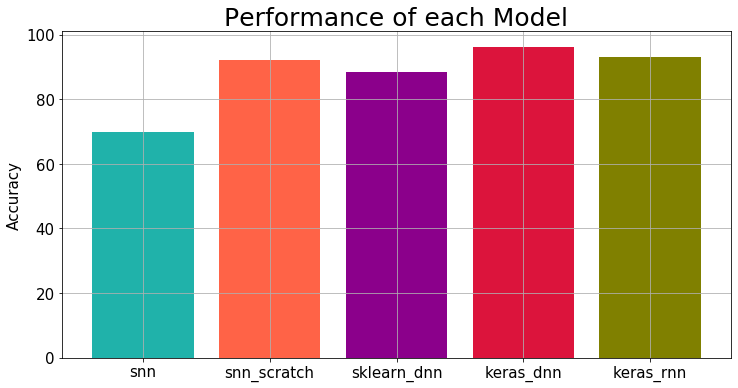

In [33]:
performance = [snn_accuracy,nn0_accuracy,dnn_accuracy,keras_dnn_accuracy,keras_rnn_accuracy ]
y = ['snn','snn_scratch','sklearn_dnn','keras_dnn', 'keras_rnn']
fig, ax = plt.subplots(figsize = (12,6))    
ax.bar(y, performance, color = ['lightseagreen', 'tomato', 'darkmagenta', 'crimson', 'olive'])
plt.title('Performance of each Model', fontsize = 25)
plt.ylabel('Accuracy',fontsize = 15)  
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

As it is seen in the plot above the best 2 options is a deep learning model with 2 hidden layers and an RNN model using LTSM. 

# Summary of findings

- As seen in the analysis it seems that the best 2 options where the deep learning model and the LSTM model, both using keras, with 96% and 93% respectively. Something to take into account is that from Milestone 2 Random Forest got a 97% and it is to an extend a white box algorithm which gives the advantage of providing direct feedback on what features are more relevant to the prediction of the quality of the diaper.


- Deep learning models even though powerful, it should be treated and done with a lot of care. Meaning there is a lot of that needs to be consider before jumping to use a more complex model that potentially could have been done with another machine learning algorithm that would provide a better advantage. Among other things: expertise on the problem that wants to be solved, expertise in the kind of deep learning model that wants to be used, clear understanding of the assumptions and limitations of the problem and model and maybe more importantly a really good idea of the potential bias intrinsic to data that comes from an imperfect word.


- Another important point to notice is the selection of the best hyperparameters, a good way to start is by using best practices in regards the kind of problem that is being analyzed and talking to experts on the matter. Once a good guess of the best options is collected, then a grid search (or random search) around that good guess might be a great way to obtain the best hyperparameters for the mode, which is as important as any part of the analysis and machine learning model. If it is not possible to obtain a good guess, just an exploration by using grid or random search can provide a very good estimate of these parameters.


- Some recommendations for the manufacturer would be: 

    - *Keep getting data, the more data we have the better models it would be able to develop.*
    - *That leads me to the 2nd point, the other suggestion is to make sure the check their sensors and data periodically to make sure no false information is being input to the model. This could be done by working on periodic checks on the instrumentation (trends and direct comparisons with previous/calibrated states).*
    - *The list of the most relevant 50 sensors can be found in this analysis, which are the ones that we have to ensure receive proper maintenance. No to say that the other sensors does not matter, but the ones included in this analysis are the ones that provide better inside to the model in relation to the quality of the diapers.*

# Feedback Request:

1. What is the best way or the most practice way of getting hyperparameters for a deep learning model,  especially when using tensorflow and keras?


2. What is the best (or more common) way of knowing the number of layer and neurons for a problem like this one? Knowing that exploring all the combinations is very computationally expensive how do you sample a subset where the probability of higher accuracy is given?


3. In which case make sense to add other kind of deep layers to the model and not only dense layers but others?


4. Deep learning being a black box algorithm what feedback usually can be obtain from the model? what other performance parameters could be significant for this kind of manufacturing problems?